# Stock Price Prediction

In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Importing dataset
dataset = pd.read_csv('Stock_Data.csv') 

In [3]:
dataset.head() 

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
dataset.tail() 

,Date,Open,High,Low,Close,Volume
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400
60,3/17/2017,851.609985,853.400024,847.109985,852.119995,1712300


In [5]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
dataset.shape

(61, 6)

In [7]:
dataset.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [8]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,61.0,8.140056e+02,18.784303,778.809998,7.996800e+02,8.095100e+02,8.286600e+02,8.516100e+02
High,61.0,8.177556e+02,18.556004,782.780029,8.027000e+02,8.152500e+02,8.332500e+02,8.534000e+02
Low,61.0,8.097341e+02,19.384799,770.409973,7.932700e+02,8.045400e+02,8.250600e+02,8.471100e+02
Close,61.0,8.145618e+02,19.265955,771.820007,8.013400e+02,8.095600e+02,8.306300e+02,8.521200e+02
Volume,61.0,1.361269e+06,498737.586492,623400.000000,1.057900e+06,1.247700e+06,1.494500e+06,3.228900e+06


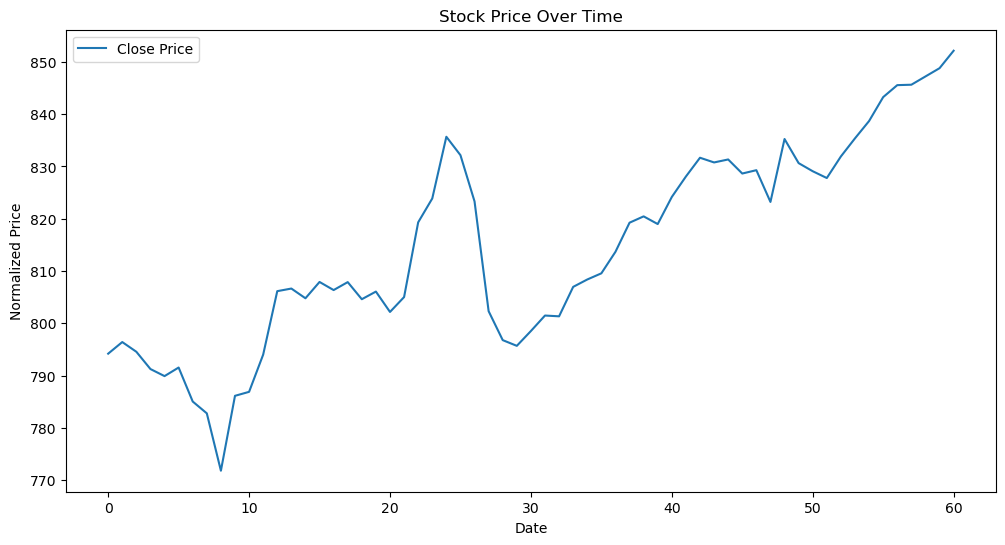

In [11]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [12]:
# Use 'Close' prices for prediction
data = dataset[['Close']].values

In [13]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [14]:
# Define a function to create sequences and labels
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [15]:
# Define hyperparameters
seq_length = 10  # Length of input sequence
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size

In [16]:
# Create sequences and labels
X_train, y_train = create_sequences(data_scaled[:train_size], seq_length)
X_test, y_test = create_sequences(data_scaled[train_size:], seq_length)

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
2/2 [==============================] - 1s 9ms/step - loss: 0.2467
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2212
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1972
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1744
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1522
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1303
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1102
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0907
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0729
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0554
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0410
Epoch 12/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0289
Epoch 13/50
2/2 [==============================] - 0s 7ms/step - loss: 0.

In [19]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [20]:
# Inverse transform predictions to get actual prices
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [21]:
# Calculate root mean squared error
train_rmse = np.sqrt(mean_squared_error(data[seq_length:train_size], train_predictions))
test_rmse = np.sqrt(mean_squared_error(data[train_size+seq_length:], test_predictions))

In [22]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 9.926740159329091
Test RMSE: 11.015675935003276


In [23]:
print("Actual Values:", scaler.inverse_transform(y_test))
print("Predicted Values:", test_predictions)

Actula Values: [[847.200012]
 [848.780029]
 [852.119995]]
Predicted Values: [[837.0856 ]
 [838.2725 ]
 [839.81854]]
